# Introdução

A prefeitura por meio da coleta de dados de seus sistemas, possui alguns conjuntos de dados e gostaria de explorá-los para apoiar as tomadas de decisão do prefeito e seus secretários. A base de dados da prefeitura conta com dados sobre as áreas da Saúde (dados de cidadãos que tiverem dengue), Mobilidade (dados de cidadãos que andam de ônibus) e Educação (dados de cidadãos matriculados em escolas). Sendo assim,  a cidade XPTO decidiu que seria mais conveniente contratar uma equipe de cientistas de dados, portanto, os profissionais Miqueias Sousa, Eduardo Sutil, Douglas Farias, Maria Eduarda, Thales Emanuel e Swyaguines Rosali foram convocados.

# Metodologia

Para fazer análise das tabelas, foi preciso criar uma base para incluir todos os cidadões e adicionamos 3 colunas: Educação, Saúde e Mobilidade, para indicar qual grupo(s) cada cidadão pertence, para a elaboração dos relatórios foi usado a linguagem Python juntamento com a ferramenta Jupyter Notebook.

Usamos a biblioteca pandas para ler e manipular as tabelas:

In [1]:
import pandas as pd

base_df = pd.read_csv('base.csv', sep=',', index_col='ID')

educacao_col = base_df['Educação']
saude_col = base_df['Saúde']
mobilidade_col = base_df['Mobilidade']

Para criar os diagramas foi usada as bibliotecas matplotlib e matplotlib_venn:

In [2]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

# Resultados

## Conteúdo

- [1) Relatório Educação](#relatorio-educacao)
- [2) Relatório Saúde](#relatorio-saude)
- [3) Relatório Mobilidade](#relatorio-mobilidade)
- [4) Relatório Educação e Saúde](#relatorio-educacao-saude)
- [5) Relatório Educação e Mobilidade](#relatorio-educacao-mobilidade)
- [6) Relatório Saúde e Mobilidade](#relatorio-saude-mobilidade)
- [7) Relatório Saúde, Mobilidade e Educação](#relatorio-saude-mobilidade-educacao)
- [8) Informar nome, data de nascimento, data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, mas não utilizaram transporte público.](#relatorio-8)
- [9) Informar nome, data de nascimento, data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, mas não frequentaram a escola.](#relatorio-9)
- [10) Informar nome, data de nascimento, data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, mas não frequentaram a escola, nem utilizaram transporte público.](#relatorio-10)

 ## 1) Relatório Educação <a id="relatorio-educacao"></a>
 
 Informar nome, data de nascimento e id dos cidadãos de XPTO que frequentaram a escola, menos os cidadãos que tiveram dengue.

### Tabela

In [3]:
tabela_df = base_df.loc[(educacao_col == 1) & (saude_col == 0), ['Nome', 'Data de Nascimento']]

tabela_df.to_csv('relatorios/relatorio-educacao.csv')

### Diagrama

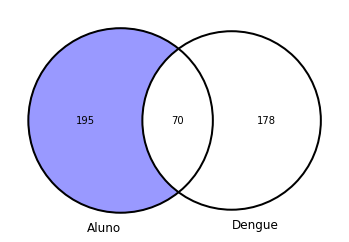

In [4]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(educacao_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (educacao_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Aluno', 'Dengue'))

for area in ['10', '01', '11']:
    v.get_patch_by_id(area).set_color('blue' if area == '10' else 'white')

venn2_circles(subsets)
plt.show()

## 2) Relatório Saúde <a id="relatorio-saude"></a>

Informar nome, data de nascimento e data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, menos os cidadãos que não utilizam ônibus.

### Tabela

In [5]:
tabela_df = base_df.loc[(saude_col == 1) & (mobilidade_col == 1), ['Nome', 'Data de Nascimento', 'Data da Dengue']]

tabela_df.to_csv('relatorios/relatorio-saude.csv')

### Diagrama

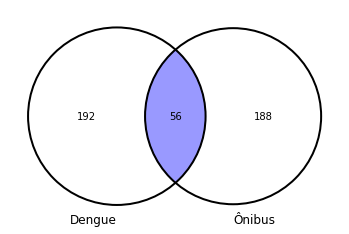

In [6]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(mobilidade_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Dengue', 'Ônibus'))

for area in ['10', '01', '11']:
    v.get_patch_by_id(area).set_color('blue' if area == '11' else 'white')
    
venn2_circles(subsets)
plt.show()

## 3) Relatório Mobilidade <a id="relatorio-mobilidade"></a>

Informar nome, data de nascimento e linhas de ônibus dos cidadãos de XPTO que utilizaram o transporte público e não tiveram dengue.

### Tabela

In [7]:
tabela_df = base_df.loc[(mobilidade_col == 1) & (saude_col == 0), ['Nome', 'Data de Nascimento', 'Ônibus']]

tabela_df.to_csv('relatorios/relatorio-mobilidade.csv')

### Diagrama

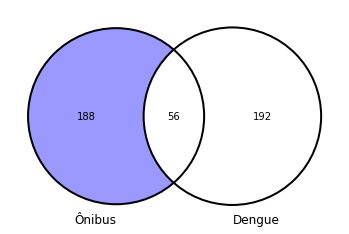

In [8]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(mobilidade_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Ônibus', 'Dengue'))

for area in ['10', '01', '11']:
    v.get_patch_by_id(area).set_color('blue' if area == '10' else 'white')
    
venn2_circles(subsets)
plt.show()

## 4) Relatório Educação e Saúde <a id="relatorio-educacao-saude"></a>

Informar nome, data de nascimento, id e data que tiveram dengue dos cidadãos de XPTO que frequentaram a escola e tiveram dengue.

### Tabela

In [9]:
tabela_df = base_df.loc[(saude_col == 1) & (educacao_col == 1), ['Nome', 'Data de Nascimento', 'Data da Dengue']]

tabela_df.to_csv('relatorios/relatorio-educacao-saude.csv')

### Diagrama

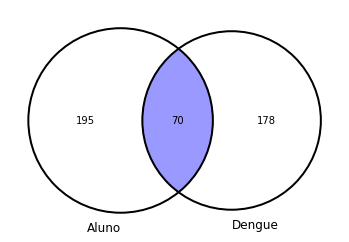

In [10]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(educacao_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (educacao_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (educacao_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Aluno', 'Dengue'))

for area in ['10', '11', '01']:
    v.get_patch_by_id(area).set_color('blue' if area == '11' else 'white')
    
venn2_circles(subsets)
plt.show()

## 5) Relatório Educação e Mobilidade <a id="relatorio-educacao-mobilidade"></a>

Informar nome, data de nascimento, id e linhas de ônibus dos cidadãos de XPTO que frequentaram a escola e utilizaram transporte público.

### Tabela

In [11]:
tabela_df = base_df.loc[(educacao_col == 1) & (mobilidade_col == 1), ['Nome', 'Data de Nascimento', 'Ônibus']]

tabela_df.to_csv('relatorios/relatorio-educacao-mobilidade.csv')

### Diagrama

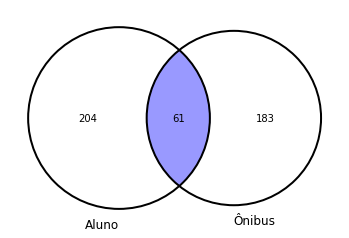

In [12]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(educacao_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(mobilidade_col == 1) & (educacao_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Aluno', 'Ônibus'))

for area in ['10', '11', '01']:
    v.get_patch_by_id(area).set_color('blue' if area == '11' else 'white')
    
venn2_circles(subsets)
plt.show()

## 6) Relatório Saúde e Mobilidade <a id="relatorio-saude-mobilidade"></a>

Informar nome, data de nascimento, data que tiveram dengue e linhas de ônibus dos cidadãos de XPTO que frequentaram o posto de saúde e utilizaram transporte público.

### Tabela

In [13]:
table_df = base_df.loc[(saude_col == 1) & (mobilidade_col == 1), ['Nome', 'Data de Nascimento', 'Data da Dengue', 'Ônibus']]

table_df.to_csv('relatorios/relatorio-saude-mobilidade.csv')

### Diagrama

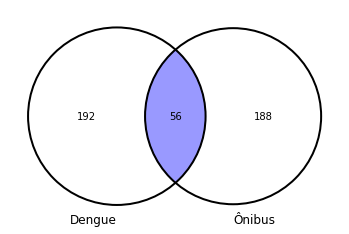

In [14]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(mobilidade_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Dengue', 'Ônibus'))

for area in ['10', '11', '01']:
    v.get_patch_by_id(area).set_color('blue' if area == '11' else 'white')
    
venn2_circles(subsets)
plt.show()

## 7) Relatório Saúde, Mobilidade e Educação <a id="relatorio-saude-mobilidade-educacao"></a>

Informar nome, data de nascimento, data que tiveram dengue e linhas de ônibus  dos cidadãos de XPTO que frequentaram o posto de saúde, utilizaram transporte público e frequentaram a escola.

### Tabela

In [15]:
tabela_df = base_df.loc[
    (educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 1), 
    ['Nome', 'Data de Nascimento', 'Data da Dengue', 'Ônibus']
]

tabela_df.to_csv('relatorios/relatorio-saude-mobilidade-educacao.csv')

### Diagrama

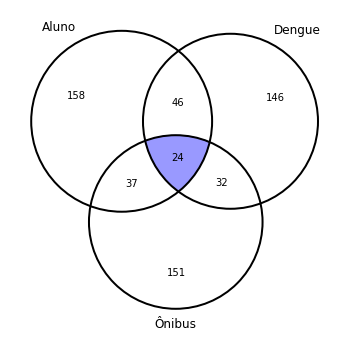

In [16]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(educacao_col == 1) & (saude_col == 0) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 0) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 0) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn3(subsets, set_labels=('Aluno', 'Dengue', 'Ônibus'))

for area in ['001', '100', '010', '110', '011', '101', '111']:
    v.get_patch_by_id(area).set_color('blue' if area == '111' else 'white')

venn3_circles(subsets)
plt.show()

## 8) Informar nome, data de nascimento, data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, mas não utilizaram transporte público. <a id="relatorio-8"></a>

### Tabela

In [17]:
table_df = base_df.loc[(saude_col == 1) & (mobilidade_col == 0), ['Nome', 'Data de Nascimento', 'Data da Dengue']]

table_df.to_csv('relatorios/relatorio-8.csv')

### Diagrama

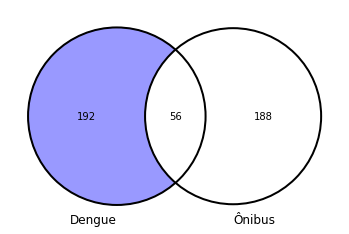

In [18]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(mobilidade_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Dengue', 'Ônibus'))

for area in ['10', '11', '01']:
    v.get_patch_by_id(area).set_color('blue' if area == '10' else 'white')
    
venn2_circles(subsets)
plt.show()

## 9) Informar nome, data de nascimento, data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, mas não frequentaram a escola. <a id="relatorio-9"></a>

### Tabela

In [19]:
table_df = base_df.loc[(saude_col == 1) & (educacao_col == 0), ['Nome', 'Data de Nascimento', 'Data da Dengue']]

table_df.to_csv('relatorios/relatorio-9.csv')

### Diagrama

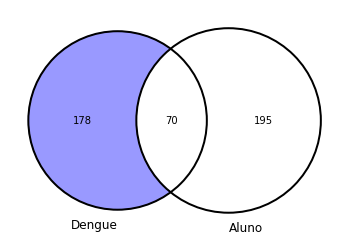

In [20]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(saude_col == 1) & (educacao_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 0)].shape[0], 
    base_df.loc[(saude_col == 1) & (educacao_col == 1)].shape[0]
)
v = venn2(subsets, set_labels=('Dengue', 'Aluno'))

for area in ['10', '01', '11']:
    v.get_patch_by_id(area).set_color('blue' if area == '10' else 'white')

venn2_circles(subsets)
plt.show()

## 10) Informar nome, data de nascimento, data que tiveram dengue dos cidadãos de XPTO que frequentaram o posto de saúde, mas não frequentaram a escola, nem utilizaram transporte público. <a id="relatorio-10"></a>

### Tabela

In [21]:
table_df = base_df.loc[
    (educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 0), 
    ['Nome', 'Data de Nascimento', 'Data da Dengue']
]

table_df.to_csv('relatorios/relatorio-10.csv')

### Diagrama

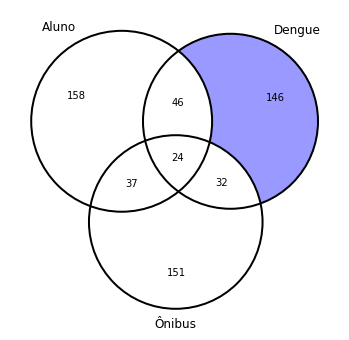

In [22]:
plt.figure(figsize=(6, 6))
subsets = (
    base_df.loc[(educacao_col == 1) & (saude_col == 0) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 0) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 0) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 1)].shape[0]
)
v = venn3(subsets, set_labels=('Aluno', 'Dengue', 'Ônibus'))

for area in ['001', '100', '010', '110', '011', '101', '111']:
    v.get_patch_by_id(area).set_color('blue' if area == '010' else 'white')

venn3_circles(subsets)
plt.show()

# Conclusão

Como conclusão, podemos fazer as seguintes afirmações:

- 158 cidadões frequentaram somente a escola
- 146 cidadões frequentaram somente o posto de saúde
- 151 cidadões somente utilizaram o transporte público
- 46 cidadões frequentaram a escola e o posto de saúde
- 32 cidadões frequentaram o posto de saúde e utilizaram o transporte público
- 37 cidadões utilizaram o transporte público e frequentaram a escola
- 24 cidadões frequentaram a escola e o posto de saúde e utilizaram o transporte público

Com isso, podemos fazer uma represetação geral no diagrama:

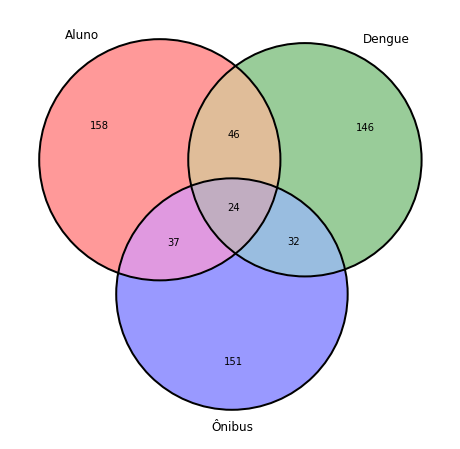

In [23]:
subsets = (
    base_df.loc[(educacao_col == 1) & (saude_col == 0) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 0)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 0) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 0) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 0) & (saude_col == 1) & (mobilidade_col == 1)].shape[0], 
    base_df.loc[(educacao_col == 1) & (saude_col == 1) & (mobilidade_col == 1)].shape[0]
)

plt.figure(figsize=(8, 8))
venn3(subsets, set_labels=('Aluno', 'Dengue', 'Ônibus'), set_colors=('red', 'green', 'blue'))
venn3_circles(subsets)
plt.show()